In [1]:
# set work dir
import os
os.chdir("..")

In [2]:
from matplotlib import pyplot as plt
import scienceplots
import numpy as np
import pandas as pd
from types import SimpleNamespace
plt.style.reload_library()
plt.style.use("science")

In [3]:
config = SimpleNamespace()
config.algo = "pfyl" # algo

In [4]:
datasizes = [25, 50, 100, 250, 500, 1000]
methods = ["separated", "comb", "gradnorm"]

In [5]:
def getDir(config):
    """
    Get dir to save figure and result
    """
    # results
    res_dir = "./res/warcraft/{}/{}".format(config.algo, config.data)
    os.makedirs(res_dir, exist_ok=True)
    return res_dir

In [6]:
def plotRegret(regret, title):
    """
    Plot regret
    """
    # colors
    colors = {"mse": "#332288", "separated":"#88ccee", "separated+mse":"#44aa99",
              "comb": "#117733", "comb+mse": "#999933", "gradnorm": "#ddcc77",
              "gradnorm+mse":"#cc6677", "scheduled": "#882255"}
    # draw plot
    fig = plt.figure(figsize=(8, 6))
    for mthd in methods:
        plt.plot(regret[mthd], color=colors[mthd], lw=2, label=mthd)
    # tick & label
    plt.xticks(ticks=range(6), labels=datasizes, fontsize=20)
    plt.yticks(fontsize=20)
    plt.ylim(0, 8)
    plt.xlabel("Data Size", fontsize=24)
    plt.ylabel("Avg Regret", fontsize=24)
    plt.legend(fontsize=24)
    plt.title(title, fontsize=28)
    # save
    save_dir = "./res/warcraft/pfyl/data_" + title.lower() + ".png"
    fig.savefig(save_dir, dpi=300)
    save_dir = "./res/warcraft/pfyl/data_" + title.lower() + ".pdf"
    fig.savefig(save_dir, dpi=300)

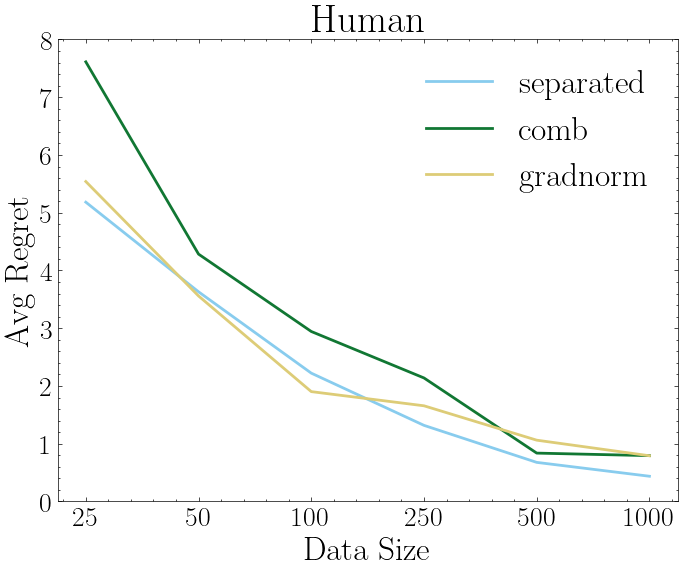

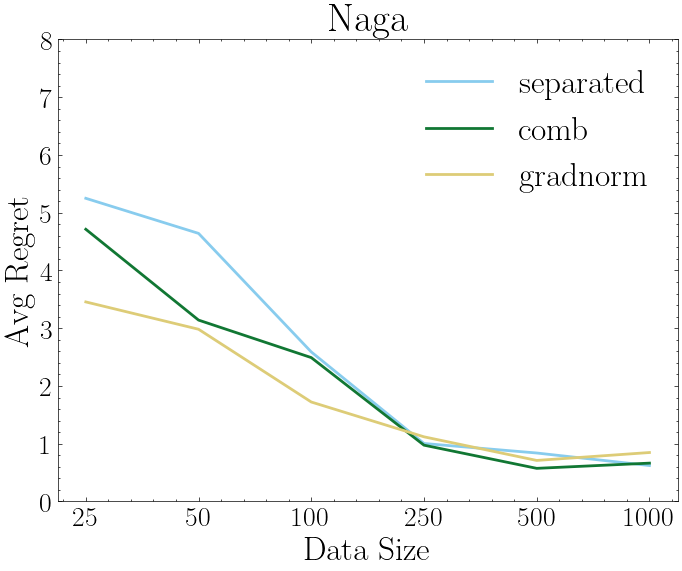

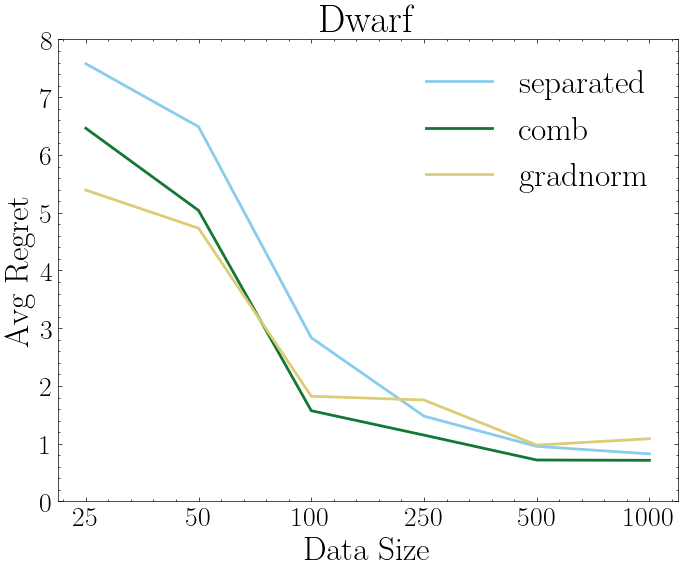

In [7]:
regret1 = {mthd:[] for mthd in methods}
regret2 = {mthd:[] for mthd in methods}
regret3 = {mthd:[] for mthd in methods}
for ds in datasizes:
    config.data = ds # data size
    res_dir = getDir(config)
    res = pd.read_csv(res_dir + "/res.csv")
    # load data
    for mthd in methods:
        regret1[mthd].append(res[res["Method"] == mthd]["Task 1 Avg Regret"].values[0])
        regret2[mthd].append(res[res["Method"] == mthd]["Task 2 Avg Regret"].values[0])
        regret3[mthd].append(res[res["Method"] == mthd]["Task 3 Avg Regret"].values[0])
# plot
plotRegret(regret1, "Human")
plotRegret(regret2, "Naga")
plotRegret(regret3, "Dwarf")